In [36]:
from aleatory.processes import GBM
from aleatory.utils.utils import draw_paths
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
import numpy as np

/home/cytech/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [8]:
r = 0.02
sigma = 0.15
x0 = 1.0
T = 6
N = 50
n = 20 * 6
gbm = GBM(initial=x0, drift=r, volatility=sigma, T=T)
paths = gbm.simulate(n=n, N=N)

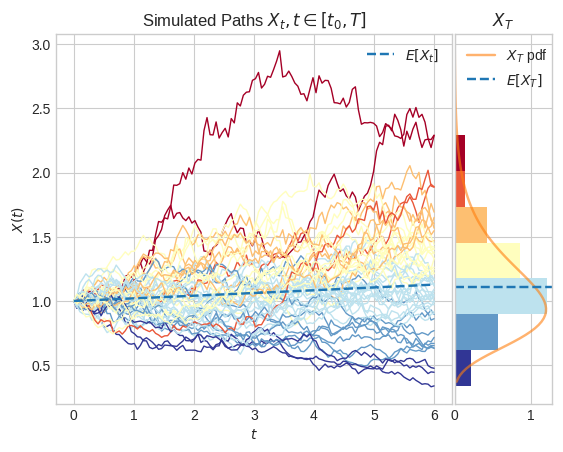

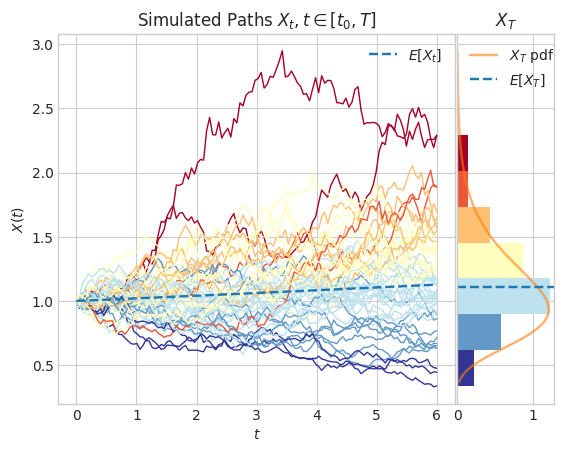

In [9]:
times = gbm.times
expectations = gbm.marginal_expectation(times)
marginalT = gbm.get_marginal(5.0)
X = np.stack(paths, axis=1)
draw_paths(
    times=times,
    paths=paths,
    N=N,
    expectations=expectations,
    marginalT=marginalT,
    marginal=True,
)

In [33]:
def variation_quadratique(t_k):
    N = 10000
    S = 0
    T = t_k
    dt = T / N
    for n in range(N):
        z = ss.norm.rvs(scale=np.sqrt(dt))
        S += np.power(z, 2)
    return S

In [34]:
x = np.linspace(0, 1, N)
L = [variation_quadratique(t) for t in x]

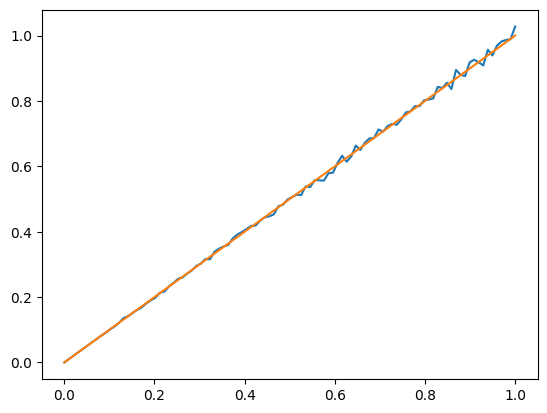

In [35]:
plt.plot(x, L)
plt.plot(x, x)

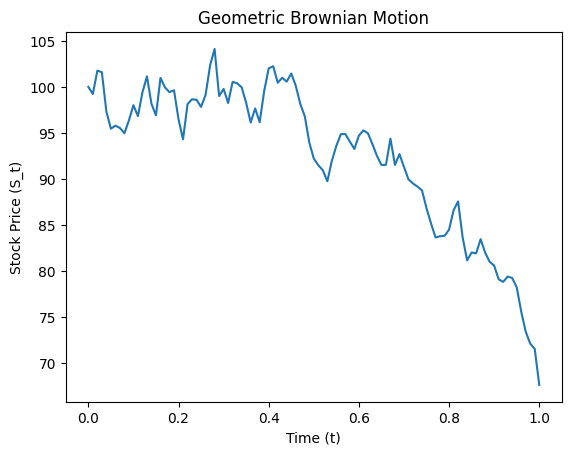

In [17]:
def geometric_brownian_motion(S0, mu, sigma, N, T, M):
    dt = T / N
    t = np.linspace(0, T, N + 1)
    dB = ss.norm.rvs(scale=np.sqrt(dt), size=(N, M))
    dB = np.vstack((np.zeros(M), dB))
    B_t = np.cumsum(dB, axis=0)
    S_t = S0 * np.exp((mu - 0.5 * sigma**2) * t[:, None] + sigma * B_t)
    return t, S_t


def option_bounds_check(call_price, strike_price, r, maturity, S0):
    """
    Check if the call option price falls within the no-arbitrage bounds.
    """
    lower_bound = strike_price * np.exp(-r * maturity)
    upper_bound = S0 - lower_bound
    if upper_bound <= call_price <= S0:
        return True
    else:
        return False


class EuropeanOptionPricing:
    def __init__(
        self,
        S0,
        strike_price,
        maturity,
        sigma: float,
        r: np.ndarray,
        dividend: bool,
        ticket: str,
        N,
    ):
        self.S0 = S0
        self.strike_price = strike_price
        self.maturity = maturity
        self.sigma = sigma
        self.r = r
        self.dividend = dividend
        self.ticket = ticket
        self.N = N

    def calibrate(self):
        """
        Calibrate the model to get the average volatility and the asset's growth rate.
        This method would typically be implemented with historical data.
        """
        pass

    def predict_volatility(self):
        """
        Predict future volatility using a model like GARCH.
        This method would typically involve fitting a GARCH model to historical data.
        """
        pass

    def hitting_time(self, scenarios):
        """
        Determine the first time the stock hits the strike price and
        the last scenarios that hit the strike price.
        """
        pass

    def price_option_call(self, S):
        """Calculate the price of a call option using the Black-Scholes model"""
        sigma = self.sigma
        r = self.r
        T = self.maturity
        K = self.strike_price
        t = np.linspace(0, T, self.N)
        d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * (T - t)) / (sigma * np.sqrt(T - t))
        d2 = d1 - sigma * np.sqrt(T - t)
        return S * ss.norm.cdf(d1) - K * np.exp(-r * (T - t)) * ss.norm.cdf(d2)

    def price_option_put(self, S):
        """Calculate the price of a put option using the Black-Scholes model"""
        sigma = self.sigma
        r = self.r
        T = self.maturity
        K = self.strike_price
        t = np.linspace(0, T, self.N)
        d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * (T - t)) / (sigma * np.sqrt(T - t))
        d2 = d1 - sigma * np.sqrt(T - t)
        return K * np.exp(-r * (T - t)) * ss.norm.cdf(-d2) - S * ss.norm.cdf(-d1)

    def grecque_indices(self):
        """etude de l'impact des parametres sur le prix de l'option"""
        pass


if __name__ == "__main__":
    S0 = 100
    mu = 0.05
    sigma = 0.2
    N = 100
    T = 1
    M = 1000

    t, S_t = geometric_brownian_motion(S0, mu, sigma, N, T, M)

    plt.plot(t, S_t[:, 0])
    plt.title("Geometric Brownian Motion")
    plt.xlabel("Time (t)")
    plt.ylabel("Stock Price (S_t)")
    plt.show()


### resolution numÃ©rique de modele de black&scholes

In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

/home/cytech/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [54]:
"""def volatility(V_0,k,theta,rho,sigma,T,N,M,seed):
    dt = T/N
    dw = ss.multivariate_normal.rvs(cov=[[dt,rho*dt],[rho*dt]],size=(N,M))
    np.vstack(np.zeros(M),dw)
    dw = np.cumsum(dw,axis=0)
    

def heston(S_0,mu,k,theta,sigma,T,N,M,seed = 1):
    dt = T/N
    S = np.zeros((N,M))
    S[0] =S_0
    for i in range(1,N):"""


'def volatility(V_0,k,theta,rho,sigma,T,N,M,seed):\n    dt = T/N\n    dw = ss.multivariate_normal.rvs(cov=[[dt,rho*dt],[rho*dt]],size=(N,M))\n    np.vstack(np.zeros(M),dw)\n    dw = np.cumsum(dw,axis=0)\n    \n\ndef heston(S_0,mu,k,theta,sigma,T,N,M,seed = 1):\n    dt = T/N\n    S = np.zeros((N,M))\n    S[0] =S_0\n    for i in range(1,N):'

In [162]:
T = 1
rho = 0.2
mu=0.6
k = 0.6
sigma = 0.2
theta = 0.3
N = 100
M = 60
dt = T / N
S_0 = 100

In [163]:
dw = ss.multivariate_normal.rvs(mean=[0, 0], cov=[[dt, rho * dt], [rho * dt, dt]], size=(N-1,M))
dw = np.vstack((np.zeros((1,M,2)),dw))
dw_0 = dw[:,:,0]
dw_1 = dw[:,:,1]
V0 = 0.2
V_t = np.zeros((N,M))
V_t[0] = V0
for i in range(1, N):
    V_t[i] = V_t[i-1] + k * (theta - V_t[i-1]) * dt + sigma * np.sqrt(V_t[i-1]) * dw_1[i]

S_t = np.zeros((N,M))
S_t[0] = S_0
for i in range(1, N):
    S_t[i] = S_t[i-1] * np.exp((mu - 0.5 * V_t[i-1]) * dt + np.sqrt(V_t[i-1]) * dw_0[i])


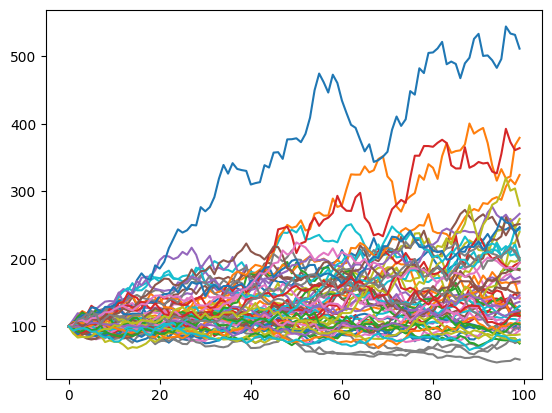

In [164]:
plt.plot(S_t)
plt.show()

In [ ]:
class HestonModel:
    def __init__(self, mu=0.6, vol_vol=0.2, k=0.6, theta=0.3, N=100, M=2, V_0=0.2, S_0=100, rho=0.2, T=1):
        self.mu = mu
        self.vol_vol = vol_vol
        self.k = k
        self.theta = theta
        self.N = N
        self.M = M
        self.V_0 = V_0
        self.S_0 = S_0
        self.rho = rho
        self.T = T
        self.dt = T / N

    def generate_paths(self):
        dw = ss.multivariate_normal.rvs(cov=[[self.dt, self.rho * self.dt], [self.rho * self.dt, self.dt]], size=(self.N-1, self.M))
        dw = np.vstack((np.zeros((1, self.M, 2)), dw))
        dw_0 = dw[:, :, 0]
        dw_1 = dw[:, :, 1]

        V_t = np.zeros((self.N, self.M))
        V_t[0] = self.V_0
        S_t = np.zeros((self.N, self.M))
        S_t[0] = self.S_0

       for i in range(1, self.N):
            V_t[i] = V_t[i-1] + self.k * (self.theta - V_t[i-1]) * dt + self.sigma * np.sqrt(V_t[i-1]) * dw_1[i]

        V_t = np.maximum(V_t, 0)

        for j in range(self.M):
            for i in range(1, self.N):
                S_t[i, j] = S_t[i-1, j] * np.exp((self.mu - 0.5 * V_t[i-1, j]) * self.dt + np.sqrt(V_t[i-1, j]) * dw_0[i, j])

        return V_t, S_t


heston_model = HestonModel()
V_t, S_t = heston_model.generate_paths()

print("Variance trajectories:\n", V_t)
print("Asset price trajectories:\n", S_t)

# Example usage with custom parameters
custom_heston_model = HestonModel(mu=0.5, vol_vol=0.3, k=0.7, theta=0.4, N=200, M=5, V_0=0.1, S_0=150, rho=0.1, T=2)
V_t_custom, S_t_custom = custom_heston_model.generate_paths()

print("Custom variance trajectories:\n", V_t_custom)
print("Custom asset price trajectories:\n", S_t_custom)
